<a href="https://colab.research.google.com/github/Skshamim02/BERT-based-TwitterMood/blob/main/Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import pandas as pd


# Get the file from the user's Google Drive
file_path = '/content/labeled_tweets_dataset.csv'

# Read the file into a pandas DataFrame
df = pd.read_csv(file_path, encoding='latin1')



In [187]:
print(df)

       Unnamed: 0              user  \
0               0    @ahmadwaraichh   
1               1  @W97537438Denise   
2               2     @nair_nandu08   
3               3          @Byron47   
4               4   @Period65995738   
...           ...               ...   
11221       11221      @binaratmaja   
11222       11222  @Chic_AvantGarde   
11223       11223     @GeorgeProust   
11224       11224       @GemYardBTC   
11225       11225  @DivisiveContent   

                                                   tweet  \
0      Former minister in Shahbaz Sharif's cabinet, w...   
1      No we have a catastrophe in our House! It wasn...   
2      This man @AbhishekJa98788  is using my dp and ...   
3      Inside Elon Musk's Neuralink lab where 1,500 a...   
4      An apology isn't accountability.   He broke th...   
...                                                  ...   
11221  elonmusk: @Culture_Crit What a crazy thing for...   
11222  I'll start a thread posting the spam account

In [188]:
# Replace the sentiment strings with numerical codes
sentiment_mapping = {'neutral': 0, 'positive': 2, 'negative': 1}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)


In [189]:
print(df)

       Unnamed: 0              user  \
0               0    @ahmadwaraichh   
1               1  @W97537438Denise   
2               2     @nair_nandu08   
3               3          @Byron47   
4               4   @Period65995738   
...           ...               ...   
11221       11221      @binaratmaja   
11222       11222  @Chic_AvantGarde   
11223       11223     @GeorgeProust   
11224       11224       @GemYardBTC   
11225       11225  @DivisiveContent   

                                                   tweet  \
0      Former minister in Shahbaz Sharif's cabinet, w...   
1      No we have a catastrophe in our House! It wasn...   
2      This man @AbhishekJa98788  is using my dp and ...   
3      Inside Elon Musk's Neuralink lab where 1,500 a...   
4      An apology isn't accountability.   He broke th...   
...                                                  ...   
11221  elonmusk: @Culture_Crit What a crazy thing for...   
11222  I'll start a thread posting the spam account

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11226 entries, 0 to 11225
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          11226 non-null  int64 
 1   user                11226 non-null  object
 2   tweet               10855 non-null  object
 3   preprocessed_tweet  10318 non-null  object
 4   sentiment           11226 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 438.6+ KB


In [191]:
df = df[['preprocessed_tweet','sentiment']]

In [192]:
df


,preprocessed_tweet,sentiment
0,former minister shahbaz sharif cabinet pledged...,0
1,catastrophe house border life america american...,1
2,man abhishekja98788 using dp name elonmusk twi...,0
3,inside elon musk neuralink lab animal killed t...,1
4,apology accountability broke law,0
...,...,...
11221,elonmusk crazy thing say,1
11222,start thread posting spam account blocked cait...,0
11223,lot easier rely traitorous elon musk,0
11224,elonmusk groq grok,0


In [193]:
df = df[['preprocessed_tweet','sentiment']]

In [194]:
df

,preprocessed_tweet,sentiment
0,former minister shahbaz sharif cabinet pledged...,0
1,catastrophe house border life america american...,1
2,man abhishekja98788 using dp name elonmusk twi...,0
3,inside elon musk neuralink lab animal killed t...,1
4,apology accountability broke law,0
...,...,...
11221,elonmusk crazy thing say,1
11222,start thread posting spam account blocked cait...,0
11223,lot easier rely traitorous elon musk,0
11224,elonmusk groq grok,0


In [195]:
df.shape

(11226, 2)

<Axes: xlabel='sentiment'>

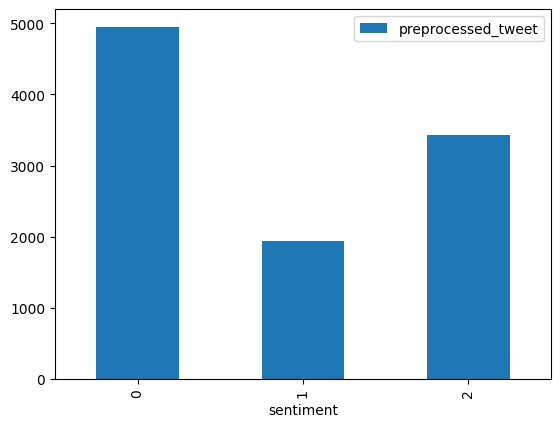

In [196]:
# The distribution of sentiments
df.groupby('sentiment').count().plot(kind='bar')

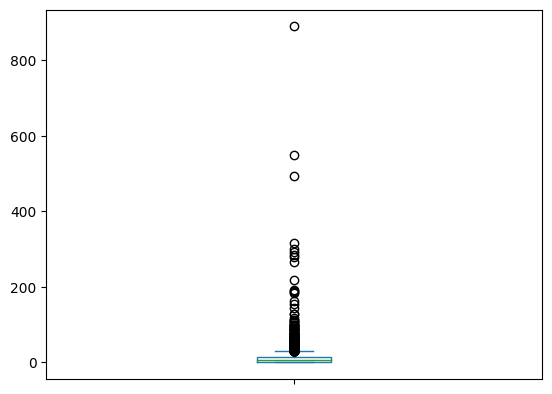

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate tweet lengths, converting all entries to strings first
tweet_len = pd.Series([len(str(tweet).split()) for tweet in df['preprocessed_tweet']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

# Display the plot
plt.show()


In [198]:
import plotly.express as px
fig = px.pie(df, names='sentiment', title ='Pie chart of different sentiments of tweets')
fig.show()

In [199]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [200]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['preprocessed_tweet'][0])
print("\nProcessed tweet ->", tweet_to_words(df['preprocessed_tweet'][0]))


Original tweet -> former minister shahbaz sharif cabinet pledged stay away journalism back journalist writing al jazeera x reader added context feature giving u reality check thank elonmusk

Processed tweet -> ['former', 'minist', 'shahbaz', 'sharif', 'cabinet', 'pledg', 'stay', 'away', 'journal', 'back', 'journalist', 'write', 'al', 'jazeera', 'x', 'reader', 'ad', 'context', 'featur', 'give', 'u', 'realiti', 'check', 'thank', 'elonmusk']


In [201]:
import re

def tweet_to_words(tweet):
    # Check if tweet is not a string
    if not isinstance(tweet, str):
        # Convert non-strings to strings (this will handle floats and other types)
        tweet = str(tweet)

    # Convert to lowercase
    text = tweet.lower()
    # Remove non-letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Tokenize or further process the text as needed

    return text

# Apply data processing to each tweet
X = list(map(tweet_to_words, df['preprocessed_tweet']))


In [202]:
X

['former minister shahbaz sharif cabinet pledged stay away journalism back journalist writing al jazeera x reader added context feature giving u reality check thank elonmusk',
 'catastrophe house border life america american stupid know congress job fix frumpy even said',
 'man abhishekja98788 using dp name elonmusk twitterindia please stop act thank',
 'inside elon musk neuralink lab animal killed test monkey subjected suffering appalling',
 'apology accountability broke law',
 'nan',
 'elonmusk expose zionist war crime genocide innocent civilian since got reinstated 13 month ago account gained follower every single day get 1 million like day happening elon pet check account webside verifiy x punishes people speaking war crime matter try suppress sure stand right side history unlike elonmusk',
 'mark apology almost sincere justin trudeau apology sorry go though let clear learning experience everyone',
 'lot coincidence piling',
 'true elonmusk need hire texan bring california employee

In [203]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['sentiment'])

In [204]:
Y

array([0, 1, 0, ..., 0, 0, 2])

In [205]:
import pandas as pd  # Assuming pandas is not already imported
from sklearn.model_selection import train_test_split

# the preprocessing for 'X' is already done
y = pd.get_dummies(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [206]:
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Instantiate CountVectorizer with the provided options
count_vector = CountVectorizer(max_features=vocabulary_size,
                               # ngram_range=(1,2),  # Enable to use unigram and bigram
                               preprocessor=lambda x: x,
                               tokenizer=lambda x: x)

# Fit the vectorizer on the training data and transform the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform the validation and testing datasets
X_val = count_vector.transform(X_val).toarray()
X_test = count_vector.transform(X_test).toarray()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [207]:

print(count_vector.get_feature_names_out()[:200])


[' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g'
 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y'
 'z']


In [210]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 50

def tokenize_pad_sequences(text):
    '''
    This function tokenizes the input text into sequences of integers and then
    pads each sequence to the same length.
    '''
    # Ensure all inputs are strings
    text = text.astype(str)

    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # Return sequences
    return X, tokenizer

# Example usage
print('Before Tokenization & Padding \n', df['preprocessed_tweet'][0])
X, tokenizer = tokenize_pad_sequences(df['preprocessed_tweet'])
print('After Tokenization & Padding \n', X[0])


Before Tokenization & Padding 
 former minister shahbaz sharif cabinet pledged stay away journalism back journalist writing al jazeera x reader added context feature giving u reality check thank elonmusk
After Tokenization & Padding 
 [1086 2765 3925 3926 2417 3927  439  182 3239   40 1304 2766  544 2767
    8 3928 1153  974 1305  752   16  753  389  123    2    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [211]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [212]:
y = pd.get_dummies(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (7577, 50) (7577, 3)
Validation Set -> (2526, 50) (2526, 3)
Test Set -> (1123, 50) (1123, 3)


In [213]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [214]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

# Parameters
vocab_size = 5000
embedding_size = 128
epochs = 100
initial_learning_rate = 0.1
momentum = 0.8

# Define the learning rate schedule function
def lr_schedule(epoch, lr):
    decay_rate = 0.1
    decay_step = 1
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

In [215]:
# Initialize the SGD optimizer with the updated argument
sgd = SGD(learning_rate=initial_learning_rate, momentum=momentum, nesterov=False)

In [218]:
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [219]:
# Initialize the LearningRateScheduler with the schedule function
lr_scheduler = LearningRateScheduler(lr_schedule)
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 128
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 128)           640000    
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 64)            24640     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 25, 64)            0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                

In [220]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8032
Precision : 0.8052
Recall    : 0.8023
F1 Score  : 0.8037


36/36 [==============================] - 0s 4ms/step


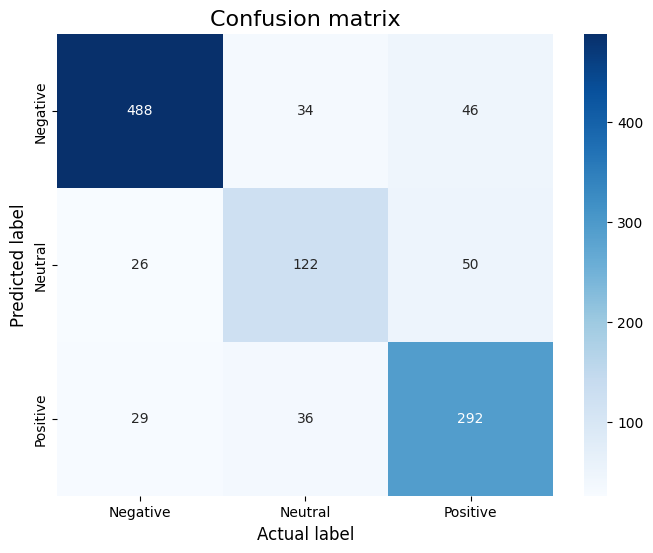

In [230]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes= ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)